# Simple Linear Regression

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error,
mean_squared_error, r2_score)

In [2]:
df = pd.read_csv('income.data.csv', index_col=0)

In [3]:
df

,income,happiness
1,3.862647,2.314489
2,4.979381,3.433490
3,4.923957,4.599373
4,3.214372,2.791114
5,7.196409,5.596398
...,...,...
494,5.249209,4.568705
495,3.471799,2.535002
496,6.087610,4.397451
497,3.440847,2.070664


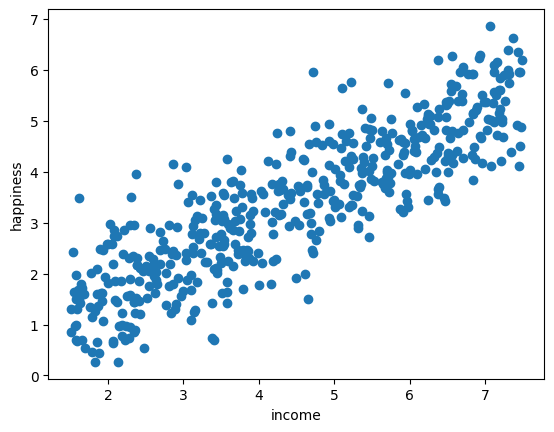

In [4]:
plt.scatter(df['income'], df['happiness'])
plt.xlabel('income')
plt.ylabel('happiness')
plt.show()

In [5]:
x = df['income'].values.reshape(-1,1)
y = df['happiness'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Coefficient 0:", lr.intercept_)
print("Coefficient 1:", lr.coef_)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2",r2_score(y_test,y_pred))

Coefficient 0: 0.2232176547267115
Coefficient 1: [0.71488887]
MAE 0.5813657431152426
MSE 0.5107393914772065
RMSE 0.7146603329395066
R2 0.7281384358077587


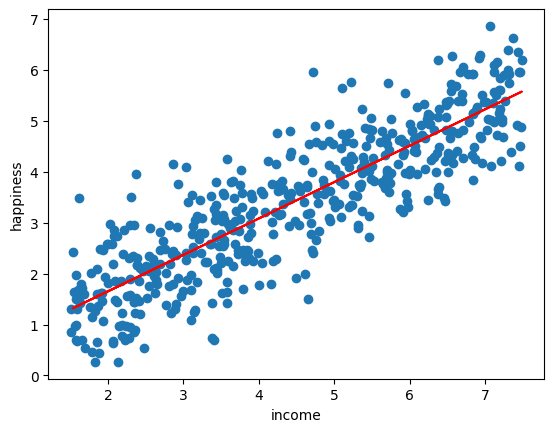

In [7]:
plt.scatter(df['income'], df['happiness'])
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel('income')
plt.ylabel('happiness')
plt.show()

# Custom Simple Linear Regression


In [8]:
class CustomLinearRegression:
    def __init__(self):
        self.coefficient_0 = 0
        self.coefficient_1 = 0
    
    def fit(self, x, y):
        n = len(x)
        
        mean_x = sum(x) / n
        mean_y = sum(y) / n
        
        numer = 0
        denom = 0
        for i in range(n):
            numer += (x[i] - mean_x) * (y[i] - mean_y)
            denom += (x[i] - mean_x) ** 2
        
        self.coefficient_1 = (numer / denom)
        self.coefficient_0 = (mean_y - self.coefficient_1 * mean_x)[0]
    
    def predict(self, x):
        predicted_y = [self.coefficient_0 + self.coefficient_1 * xi for xi in x]
        return predicted_y

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Coefficient 0:", lr.intercept_)
print("Coefficient 1:", lr.coef_)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2",r2_score(y_test,y_pred))

Coefficient 0: 0.2232176547267115
Coefficient 1: [0.71488887]
MAE 0.5813657431152426
MSE 0.5107393914772065
RMSE 0.7146603329395066
R2 0.7281384358077587


In [10]:
model = CustomLinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Coefficient 0:", model.coefficient_0)
print("Coefficient 1:", model.coefficient_1)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2",r2_score(y_test,y_pred))

Coefficient 0: 0.2232176547267093
Coefficient 1: [0.71488887]
MAE 0.5813657431152415
MSE 0.510739391477205
RMSE 0.7146603329395056
R2 0.7281384358077594
